In [2]:
import pandas as pd




In [3]:
df= pd.read_csv("netflix_titles.csv")


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
# Dropping any dublicates
df.drop_duplicates(inplace=True)

In [7]:
#Since there is so much missing data in director column; I am gonna fill it with 'unkmown' tag
df['director'].fillna('Unknown', inplace=True)

In [8]:
# in the similar way filling cast, country, date_added, rating and duration; all missing values with unknown in 1 go
df.fillna('Unknown', inplace=True)

Simple data cleaning completed.

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

How many movies VS Tv shows are there?

<Axes: title={'center': 'Movies vs TV shows'}, xlabel='type'>

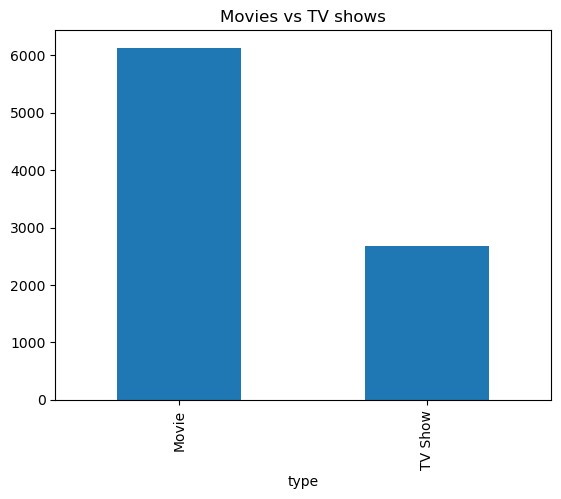

In [10]:
df['type'].value_counts().plot(kind='bar',title='Movies vs TV shows')

Which countries produce the most Netflix content?
The top 10.

<Axes: title={'center': 'Top 10 Countries'}, ylabel='country'>

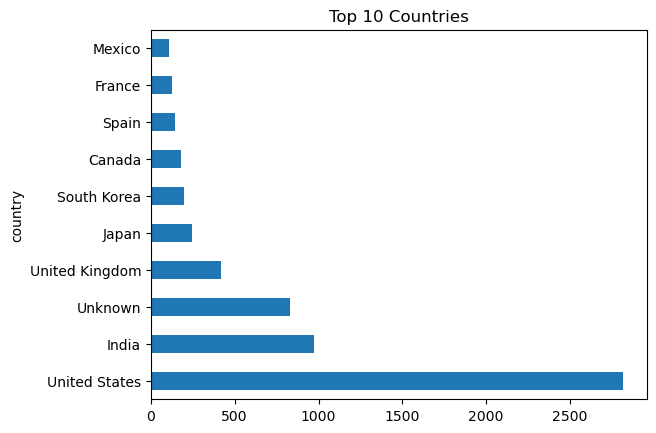

In [11]:
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries')


Who are the most frequent directors? top 10

<Axes: title={'center': 'Top Directors'}, ylabel='director'>

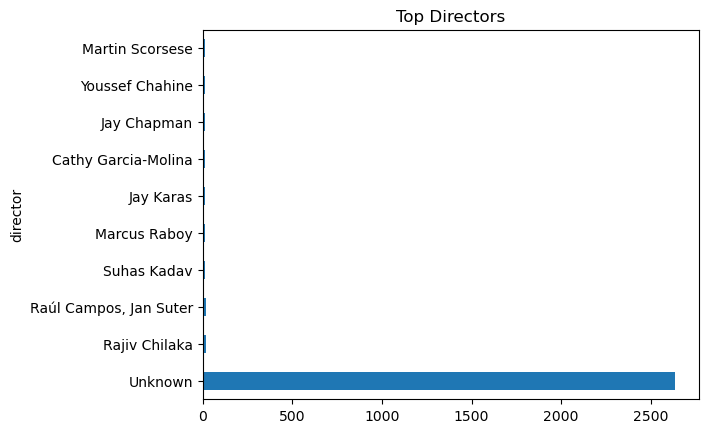

In [12]:
df['director'].value_counts().head(10).plot(kind='barh', title='Top Directors')


<Axes: title={'center': 'Top Directors'}, ylabel='director'>

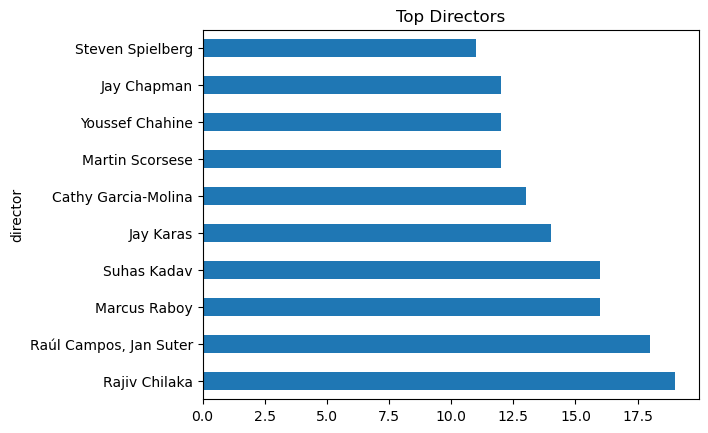

In [13]:
# to exclude the 'Unknown' value
df['director'].loc[df['director'] != 'Unknown'].value_counts().head(10).plot(kind='barh', title='Top Directors')

What is the most common genre?

<Axes: title={'center': 'Top 10 Genres'}>

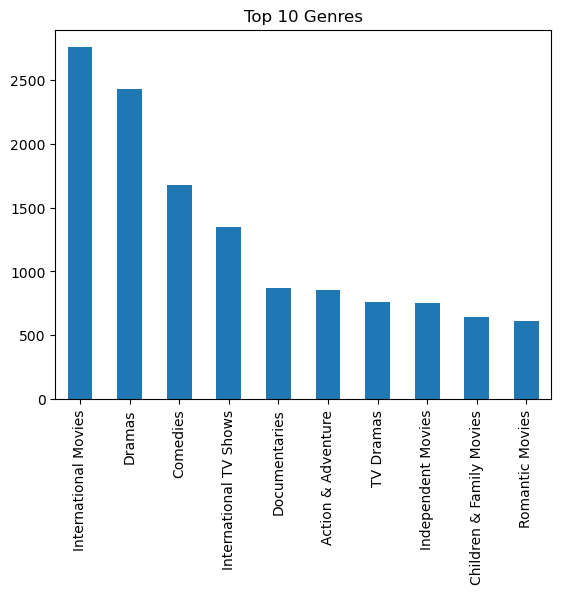

In [14]:
from collections import Counter

genres = ','.join(df['listed_in'].dropna()).split(',')
genre_count = Counter([g.strip() for g in genres])
pd.Series(genre_count).nlargest(10).plot(kind='bar', title='Top 10 Genres')


How has the content grown over the years?